# Dataset Statistics

This notebook plots statistics for our RNA inverse design dataset created using [RNASolo](https://rnasolo.cs.put.poznan.pl).
We visualise the diversity of our dataset in terms of sequence length, number of structures per sequence, as well as structural variations among conformations per sequence.

In [1]:
######################################################################
# Geometric RNA Design, Joshi et al.
# Original repository: https://github.com/chaitjo/geometric-rna-design
######################################################################
 
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import dotenv
dotenv.load_dotenv("../.env")

True

In [2]:
import os
import ast
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition, mark_inset
import seaborn as sns

In [3]:
DATA_PATH = os.environ.get("DATA_PATH")
seq_to_data = torch.load(os.path.join(DATA_PATH, "processed.pt"))
data_list = list(seq_to_data.values())

df = pd.read_csv(os.path.join(DATA_PATH, "processed_df.csv"))
# convert strings to lists
df["id_list"] = df["id_list"].apply(ast.literal_eval)
df["rfam_list"] = df["rfam_list"].apply(ast.literal_eval)
# remove 'unknown' from 'rfam_list' column
df["rfam_list"] = df["rfam_list"].apply(lambda x: [i for i in x if i != "unknown"])
df["eq_class_list"] = df["eq_class_list"].apply(ast.literal_eval)
df["type_list"] = df["type_list"].apply(ast.literal_eval)
# create new columns for the most common value in each list
df["type"] = df["type_list"].apply(lambda x: max(x, key=x.count))
df["rfam"] = df["rfam_list"].apply(lambda x: max(x, key=x.count) if len(x) > 0 else "unknown")
df

/tmp/ipykernel_1598914/4223770974.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  seq_to_data = torch.load(os.path.join(DATA_PATH, "processed.pt"))


,id_list,rfam_list,eq_class_list,type_list,cluster_seqid0.8,cluster_structsim0.45,sequence,length,mean_rmsd,median_rmsd,num_structures,type,rfam
0,[8KIE_1_a],[],[unknown],[unknown],308,47,ACCGAAACUAAUUUAGCGGACCGGAGGCUAUGUUGGGCGUGUAGUG...,358,0.000000,0.000000,1,unknown,unknown
1,"[1VQN_1_9, 1Q82_1_B, 3CXC_1_9, 1Q7Y_1_B, 1N8R_...","[5S_rRNA, 5S_rRNA, 5S_rRNA, 5S_rRNA, 5S_rRNA, ...","[25303, 25303, 25303, 25303, 25303, 25303, 253...","[Protein-RNA Complex, Protein-RNA Complex, Pro...",406,148,UUAGGCGGCCACAGCGGUGGGGUUGCCUCCCGUACCCAUCCCGAAC...,122,0.466553,0.540285,37,Protein-RNA Complex,5S_rRNA
2,"[7UVW_1_a, 7RYF_1_a, 7RYH_1_a, 7UVZ_1_a, 7M4Z_...","[5S_rRNA, 5S_rRNA, 5S_rRNA, 5S_rRNA, 5S_rRNA, ...","[43481, 43481, 43481, 43481, 43481, 43481, 434...","[Protein-RNA Complex, Protein-RNA Complex, Pro...",1,5,UAACUGAAGAGUUUGAUCAUGGCUCAGAUUGAACGCUGGCGGCAGG...,1519,2.746214,2.628028,14,Protein-RNA Complex,5S_rRNA
3,"[8BHN_1_4, 8BHJ_1_4, 8BH4_1_4, 8BF7_1_4]",[],"[35542, 35542, 35542, 35542]","[Solo RNA, Solo RNA, Solo RNA, Solo RNA]",561,240,CGCGGGGGGAGCAGCCUGGUAGCUCGUCGGGUCAUAACCCGAAGGU...,74,0.677982,0.673382,4,Solo RNA,unknown
4,"[7U2H_1_1x, 8G29_1_1x, 8CVK_1_1x, 7U2H_1_2x, 7...","[5S_rRNA, 5S_rRNA, 5S_rRNA, 5S_rRNA, 5S_rRNA, ...","[35542, unknown, 35542, 35542, 35542, unknown,...","[Solo RNA, unknown, Solo RNA, Solo RNA, Solo R...",561,240,CGCGGGGGGAGCAGCCUGGUAGCUCGUCGGGUCAUAACCCGAAGGU...,72,0.363182,0.363663,24,Solo RNA,5S_rRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3958,[6JDV_1_B],[CRISPR-DR34],[38966],[Protein-RNA Complex],386,131,GGUCACUCUGCUAUUUAACUUUACGUUGUAGCUCCCUUUCUCAUUU...,143,0.000000,0.000000,1,Protein-RNA Complex,CRISPR-DR34
3959,[7Q4K_1_D2],[5S_rRNA],[54715],[Protein-RNA Complex],544,240,GGCUACGAGCUCAGGAGAGCACAUCACUAUAGAUGGGCACAGGCGA...,64,0.000000,0.000000,1,Protein-RNA Complex,5S_rRNA
3960,[8BTK_1_AT],[5S_rRNA],[67862],[Protein-RNA Complex],638,240,GCCGUGAUCGUAUAGUGGUUAGUACUCUGCGUUGUGGCCGCAGCAA...,72,0.000000,0.000000,1,Protein-RNA Complex,5S_rRNA
3961,[5J7L_1_CA],[5S_rRNA],[83717],[Protein-RNA Complex],1,3,GGUUAAGCGACUAAGCGUACACGGUGGAUGCCCUGGCAGUCAGAGG...,2875,0.000000,0.000000,1,Protein-RNA Complex,5S_rRNA


In [4]:
# Number of unique sequences
len(df)

3963

In [5]:
# Total number of structures
df["num_structures"].sum()

12091

In [6]:
# Types of structures
df["type"].value_counts()

type
Protein-RNA Complex    2612
unknown                 858
Solo RNA                479
DNA-RNA Hybrid           14
Name: count, dtype: int64

In [7]:
# # Number of unique rfam families
# for family, count in zip(df["rfam"].unique(), df["rfam"].value_counts()):
#     print(f"{family}: {count}")

# Plot sns histogram of rfam_families column sorted by frequency of each family
# plt.figure(figsize=(10, 5))
# sns.histplot(df["rfam"].loc[df["rfam"] != "unknown"])
# plt.xticks(rotation=75)
# plt.show()

In [8]:
# Distribution of sequence length

seq_lens = df["length"].values

print(f"Distribution: {np.mean(seq_lens):.2f} +- {np.std(seq_lens):.2f}")
print(f"Max: {np.max(seq_lens)}, Min: {np.min(seq_lens)}")

Distribution: 851.74 +- 1148.69
Max: 4455, Min: 11


/tmp/ipykernel_1598914/1957729900.py:16: MatplotlibDeprecationWarning: The InsetPosition class was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use Axes.inset_axes instead.
  ip = InsetPosition(ax1, [0.4,0.4,0.5,0.5])


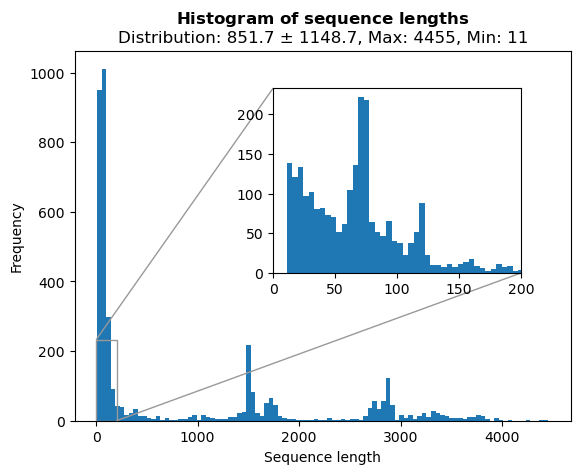

In [9]:
fig, ax1 = plt.subplots()

# Plot a histogram
ax1.hist(seq_lens, bins=100)

# Add labels and title
ax1.set_xlabel('Sequence length')
ax1.set_ylabel('Frequency')
ax1.set_title( 
    r"$\bf{" + "Histogram \ of \ sequence \ lengths" + "}$" + f"\nDistribution: {np.mean(seq_lens):.1f} ± {np.std(seq_lens):.1f}, Max: {np.max(seq_lens)}, Min: {np.min(seq_lens)}"
)

# Create a set of inset Axes
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.4,0.4,0.5,0.5])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 
# and draw lines in grey linking the two axes.
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.6')

# Plot second histogram
ax2.hist(seq_lens, bins=1000)
ax2.set_xlim([0,200])

# Some ad hoc tweaks.
# ax2.set_xticklabels(ax2.get_xticks(), backgroundcolor='w')
# ax2.tick_params(axis='x', which='major', pad=8)

# Display the plot
# plt.savefig('hist_seq_len.pdf', dpi=300)
plt.show()

In [10]:
# Distribution of number of structures per unique sequence

num_struct_per_seq = df["num_structures"].values
print(f"Distribution: {np.mean(num_struct_per_seq)} +- {np.std(num_struct_per_seq)}")
print(f"Max: {np.max(num_struct_per_seq)}, Min: {np.min(num_struct_per_seq)}")

Distribution: 3.050971486247792 +- 10.651330727562767
Max: 301, Min: 1


/tmp/ipykernel_1598914/4089939208.py:17: MatplotlibDeprecationWarning: The InsetPosition class was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use Axes.inset_axes instead.
  ip = InsetPosition(ax1, [0.4,0.4,0.5,0.5])


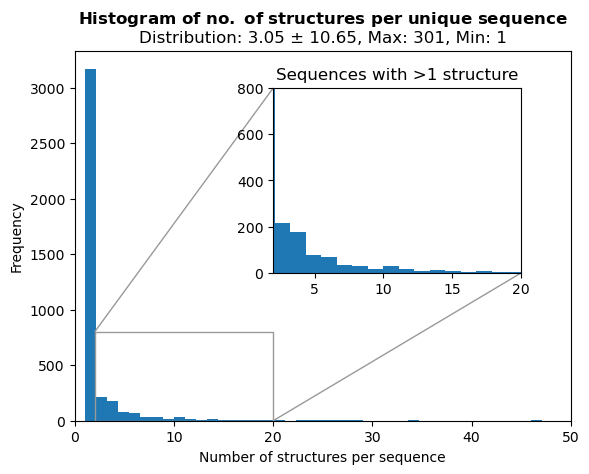

In [11]:
fig, ax1 = plt.subplots()

# Plot a histogram
ax1.hist(num_struct_per_seq, bins=267)

# Add labels and title
ax1.set_xlabel('Number of structures per sequence')
ax1.set_ylabel('Frequency')
ax1.set_title( 
    r"$\bf{" + "Histogram \ of \ no. \ of \ structures \ per \ unique \ sequence" + "}$" + f"\nDistribution: {np.mean(num_struct_per_seq):.2f} ± {np.std(num_struct_per_seq):.2f}, Max: {np.max(num_struct_per_seq)}, Min: {np.min(num_struct_per_seq)}"
)
ax1.set_xlim([0,50])

# Create a set of inset Axes
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.4,0.4,0.5,0.5])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 
# and draw lines in grey linking the two axes.
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.6')

# Plot second histogram
ax2.hist(num_struct_per_seq, bins=267)
ax2.set_xlim([2,20])
ax2.set_ylim([0,800])
ax2.set_title("Sequences with >1 structure")

# Some ad hoc tweaks.
# ax2.set_xticklabels(ax2.get_xticks(), backgroundcolor='w')
# ax2.tick_params(axis='x', which='major', pad=8)

# Display the plot
# plt.savefig('hist_num_struct_per_seq.pdf', dpi=300)
plt.show()

In [12]:
# Raw values of number of some structures per sequence distribution
bin, count = np.unique(num_struct_per_seq, return_counts=True)
for i, pair in enumerate(zip(bin, count)):
    if i < 10 or i > len(bin) - 4:
        print(f"{pair[0]} structures for that sequence -> {pair[1]} samples")
    elif i == len(bin) // 2:
        print("...")

1 structures for that sequence -> 2538 samples
2 structures for that sequence -> 634 samples
3 structures for that sequence -> 214 samples
4 structures for that sequence -> 177 samples
5 structures for that sequence -> 76 samples
6 structures for that sequence -> 69 samples
7 structures for that sequence -> 36 samples
8 structures for that sequence -> 30 samples
9 structures for that sequence -> 18 samples
10 structures for that sequence -> 22 samples
...
202 structures for that sequence -> 1 samples
279 structures for that sequence -> 1 samples
301 structures for that sequence -> 1 samples


In [13]:
# Frequency of each base in the sequences
# Pyrimidine (C, U)
# Purine (A, G)

base_counts = {'A': 0, 'G': 0, 'C': 0, 'U': 0, 'other': 0}
for data in tqdm(data_list):
    for base in data['sequence']:
        if base in base_counts:
            base_counts[base] += 1
        else:
            base_counts['other'] += 1

for base in base_counts:
    print(f"{base}: {base_counts[base]}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3963/3963 [00:00<00:00, 11759.96it/s]

A: 841206
G: 1040794
C: 798325
U: 694462
other: 665


Distribution: 1.3309729276920925 +- 1.8880601902593734
Max: 18.35241640850522, Min: 2.645016652227541e-07


/var/folders/4_/jrr42vpx3vb447nslw95sscw0000gn/T/ipykernel_98447/2406943871.py:24: MatplotlibDeprecationWarning: The InsetPosition class was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use Axes.inset_axes instead.
  ip = InsetPosition(ax1, [0.4,0.4,0.5,0.5])


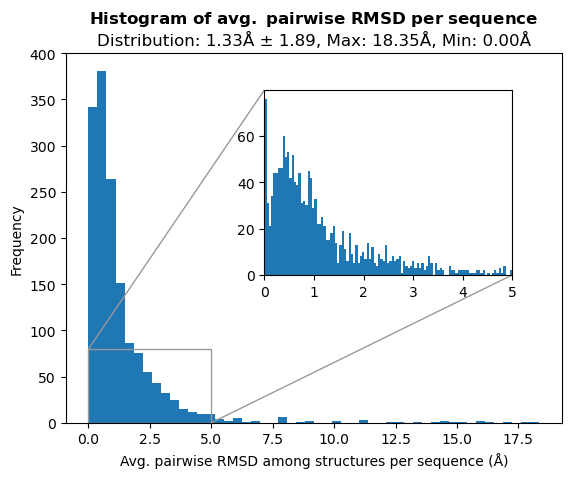

In [29]:
# Distribution of average RMSD per sequence
# Note: Omit avg. RMSD = 0, which are sequences with a single structure

rmsd_per_seq = [x for x in df["mean_rmsd"].values if x > 0.0]
print(f"Distribution: {np.mean(rmsd_per_seq)} +- {np.std(rmsd_per_seq)}")
print(f"Max: {np.max(rmsd_per_seq)}, Min: {np.min(rmsd_per_seq)}")

fig, ax1 = plt.subplots()

# Plot a histogram
ax1.hist(rmsd_per_seq, bins=50)

# Add labels and title
ax1.set_xlabel('Avg. pairwise RMSD among structures per sequence (Å)')
ax1.set_ylabel('Frequency')
# plt.title('Histogram of average RMSD per sequence')
ax1.set_title( 
    r"$\bf{" + "Histogram \ of \ avg. \ pairwise \ RMSD \ per \ sequence" + "}$" + f"\nDistribution: {np.mean(rmsd_per_seq):.2f}Å ± {np.std(rmsd_per_seq):.2f}, Max: {np.max(rmsd_per_seq):.2f}Å, Min: {np.min(rmsd_per_seq):.2f}Å"
)

# Create a set of inset Axes
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.4,0.4,0.5,0.5])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 
# and draw lines in grey linking the two axes.
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.6')

# Plot second histogram
ax2.hist(rmsd_per_seq, bins=400)
ax2.set_xlim([0,5])
# ax2.set_ylim([0,1000])

# Display the plot
# plt.savefig('hist_rmsd_per_sequence.pdf', dpi=300)
plt.show()

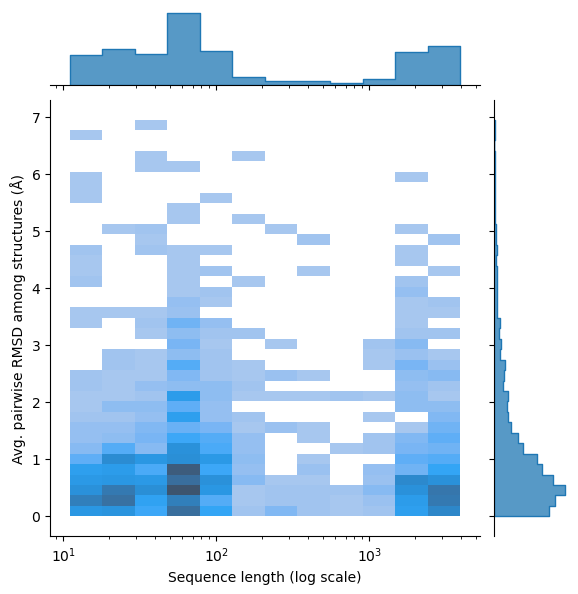

In [30]:
# df = pd.DataFrame({'Sequence length': seq_len, 'Average RMSD': rmsd_per_seq})
# create a bivariate distribution plot using seaborn
ax = sns.jointplot(
    data=df.loc[(df["mean_rmsd"] > 0.0) & (df["mean_rmsd"] < 7.5)], 
    x='length', 
    y='mean_rmsd', 
    kind='hist', 
    log_scale=(True, False), 
    marginal_kws=dict(element='step', fill=True)
)

# ax.set_ylim([0,5])

# Add labels and title
plt.xlabel('Sequence length (log scale)')
plt.ylabel('Avg. pairwise RMSD among structures (Å)')
# plt.title( 
#     "Bivariate Distribution Plot for sequence length vs. avg. pairwise RMSD"
#     # r"$\bf{" + "Histogram \ of \ avg. \ pairwise \ RMSD \ per \ sequence" + "}$" + f"\nDistribution: {np.mean(rmsd_per_seq):.2f} ± {np.std(rmsd_per_seq):.2f}, Max: {np.max(rmsd_per_seq):.2f}, Min: {np.min(rmsd_per_seq):.2f}"
# )

# Display the plot
# plt.savefig('bivariate_seq_vs_rmsd.pdf', dpi=300)
plt.show()
